In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_covid = pd.read_csv('COVID-19-time-series-clean-complete.csv')

df_covid.head(3)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0


In [3]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

df_covid['YearMonth'] = df_covid['Date'].dt.to_period('M')

df_covid.head(2)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,2020-01
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,2020-01


In [4]:
df_covid.columns = [c.replace(' ', '_') for c in df_covid.columns]
df_covid.columns = [c.replace('/', '_') for c in df_covid.columns]
YearMonth_Countries = df_covid[df_covid['Date'].dt.month == 4]
YearMonth_Countries = YearMonth_Countries[YearMonth_Countries['Date'].dt.year == 2020]

Apr20_most_affected_countries = YearMonth_Countries.groupby(['YearMonth', 'Country_Region']).New_cases.sum()

Apr20_most_affected_countries.sort_values(ascending=False)[:8]


YearMonth  Country_Region
2020-04    US                888804
           France            140313
           United Kingdom    139956
           Spain             127546
           Turkey            106673
           Russia            104161
           Italy              99671
           Germany            91201
Name: New_cases, dtype: int64

In [5]:
#df_iran = df_covid.query("Country_Region == 'Iran'")

df_iran = YearMonth_Countries.query("Country_Region == 'Iran'")
df_iran.tail(2)


,Unnamed:_0,Date,Country_Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,YearMonth
18994,18994,2020-04-29,Iran,93657,5957,73791.0,13909.0,1073,80,1352,2020-04
19187,19187,2020-04-30,Iran,94640,6028,75103.0,13509.0,983,71,1312,2020-04


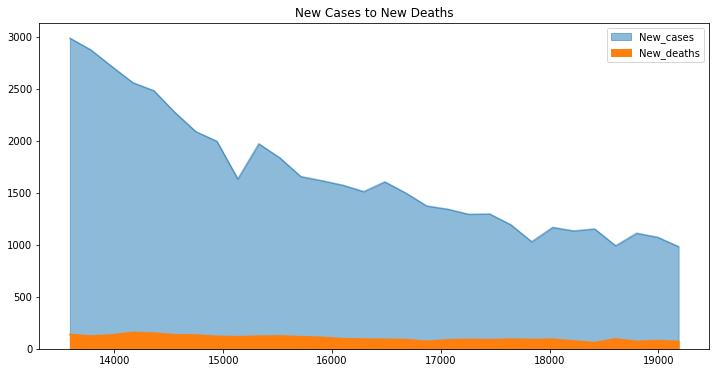

In [7]:
cases = df_iran['New_cases']
deaths = df_iran['New_deaths']
plt.figure(figsize= (12, 6))
cases.plot.area( alpha=0.5)
deaths.plot.area()
plt.title("New Cases to New Deaths")
# plt.xlim(1, 30)
plt.legend()
plt.show()

In [8]:
df_iran2 = df_iran[['Date', 'New_cases', 'New_deaths']]
df_iran2.head(3)

,Date,New_cases,New_deaths
13590,2020-04-01,2988,138
13783,2020-04-02,2875,124
13976,2020-04-03,2715,134


<Figure size 1440x432 with 0 Axes>

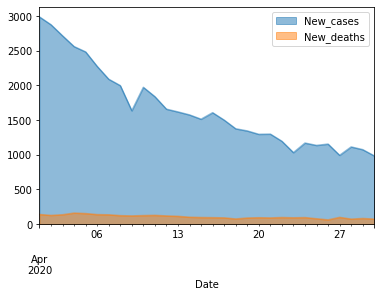

In [30]:
df_iran2.plot.area(x='Date',stacked=False)
plt.show()